# DS200: Introduction to Data Sciences
# Fall 2024

# Lab Assignment 5: Standard Deviation and Correlation (3 points)
## Instructor: John Yen
## LAs: Lauren Miller, Aaron Almeida, Amiera Masheetah Binti Irwan Rizalman, and Sharifah Rodziah Hanim BintiSyed Alwi

# Total points: 3 points
- Exercise 1: 0.1 point
- Exercise 2A: 0.2 points
- Exercise 2B: 0.4 points
- Exercise 2C: 0.3 points
- Exercise 2D: 0.9 points
- Exercise 3: 0.4 points
- Exercise 4: 0.4 points
- Exercise 5: 0.3 points


## Due: midnight October 2 (Wed), 2024


In [1]:
from datascience import *
import numpy as np

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# A Question:
Suppose you have told to find out, based on a global survey regarding income and the degree of satisfaction, **whether there is a linear relationship between national average income and national average level of satisfaction.**



In [3]:
happy_table = Table.read_table('happyscore_income.csv')
happy_table.show(5)

country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
Armenia,37,4.9,2.42,2096.76,1731.51,31.4456,'Central and Eastern Europe',4.35,0.76821,Armenia
Angola,26,4.3,3.19,1448.88,1044.24,42.72,'Sub-Saharan Africa',4.033,0.75778,Angola
Argentina,60,7.1,1.91,7101.12,5109.4,45.4756,'Latin America and Caribbean',6.574,1.05351,Argentina
Austria,59,7.2,2.11,19457,16879.6,30.2963,'Western Europe',7.2,1.33723,Austria
Australia,65,7.6,1.8,19917,15846.1,35.285,'Australia and New Zealand',7.284,1.33358,Australia


# Use `.stats()` of `Table` to get basic statistics of the different columns.

In [4]:
happy_table.stats()

statistic,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
min,Angola,19,2.5,1.38,572.88,415.48,24.215,'Australia and New Zealand',2.839,0.0153,Angola
max,Zimbabwe,74,8.5,3.19,26182.3,22240.2,63.7267,'Western Europe',7.587,1.56391,Zimbabwe
median,,48,6,2.13,3889.32,2646.97,36.48,,5.268,0.91861,
sum,,5409,659,235.83,715145,575647,4264.38,,601.832,93.4519,


# Histogram and Bins

In lab 2, we have used a histogram to visualize the distribution of delay time among all flights in the table.  
Recalls that one of the parameter for generating a histogram of a Table's column is `bins`.



## Problem 1 Generate a histogram of the avg_satisfaction column and the avg_income column using 20 bins. (0.1 points)

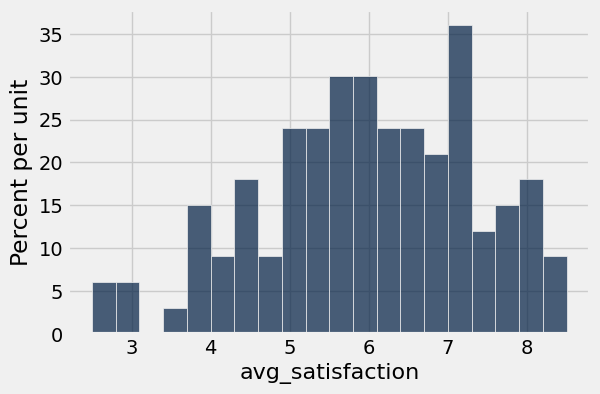

In [5]:
# Enter your code in this cell.
happy_table.hist('avg_satisfaction', bins=20)

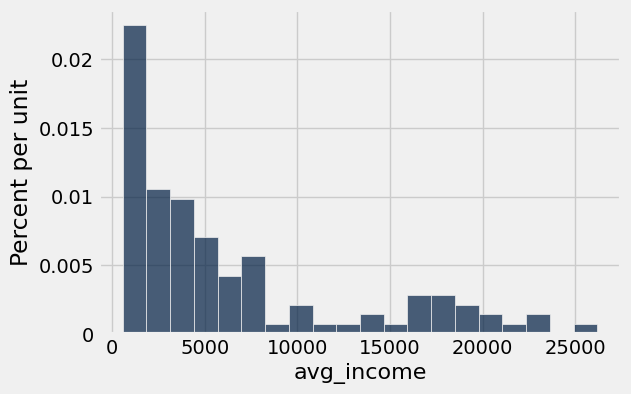

In [6]:
happy_table.hist('avg_income', bins=20)

# Part 2: Mean, Variance, Standard Deviation


To calculate the mean, across all countries in the dataset, of ``avg_satisfaction``, we need to first extract all value in the `Delay` column into an array.

## Two Ways to Extract Columns of a Table
There are two ways to extract values of column from a table: (1) `select` returns a new `Table` containing **one or more columns** specified, (2) `column` returns a `numpy array` containing all values of **one column**.

- If we want to select a few columns of a `Table` for further data analysis, aggregation, and/or visualization, we use ``select`` (the first approach).

- If we want to compute average, standard deviation of a column, we use `column` to extract its values into a `numpy array``, because it enables us to use `numpy functions` for arrays.

In [7]:
avg_sat_array = happy_table.column('avg_satisfaction')
print(avg_sat_array)

[ 4.9  4.3  7.1  7.2  7.6  5.8  5.3  7.2  4.4  4.6  2.9  3.   6.3  6.9  4.7
  5.5  8.   8.   6.8  3.9  6.2  7.9  8.5  7.1  6.6  7.2  5.7  8.4  7.5  6.8
  6.2  7.   4.2  7.9  6.4  4.2  7.1  4.3  5.4  6.5  7.   6.   5.5  6.1  7.5
  7.3  5.5  5.8  8.1  6.6  6.4  3.7  5.8  4.9  5.7  6.5  6.2  5.1  4.4  5.2
  5.8  7.7  5.5  5.3  5.3  3.7  4.7  5.7  4.9  5.9  8.3  6.6  3.8  3.8  5.3
  7.1  7.6  8.   5.3  7.8  6.5  7.   6.   6.8  5.8  6.8  6.   5.6  5.6  4.9
  7.8  7.   6.3  3.5  4.5  6.7  5.4  2.6  6.8  5.1  5.5  6.   2.5  5.1  4.5
  7.3  7.   6.1  6.3  5.   4.1]


In [8]:
avg_income_array = happy_table.column('avg_income')
print(avg_income_array)

[  2096.76         1448.88         7101.12        19457.04
  19917.           3381.6          1265.34        17168.505
    870.84         5354.82          572.88          989.04
   3985.71         5567.235        3484.68         5453.93333333
  20190.78        23400.04         7557.99         1490.52
   2673.64285714   4618.06285714   6901.46666667  10493.955
   9430.905       19285.96         1875.24        17496.51
   4430.76         3835.65333333   7906.725       13842.99
   1050.72        17310.195       18096.78857143   2520.96
  17099.55         1957.26666667   1577.04        11507.565
   3080.44         7828.08         6903.88363636   1541.74736842
  16657.77        10645.24         1357.848        5215.04
  18828.345       15437.595       14542.8          1492.68
   1852.64         1868.72         2627.00571429   3555.09333333
   1491.72         2558.28          653.04          908.64
   6789.16        26182.275        6722.90181818   2864.88
   3077.28          574.2          

### Problem 2A: Mean (0.2 points)

Calculate the mean value of `avg_satisfaction` and `avg_income` across all countries in the dataset using ``<array>.mean()``, and store the value in the variable `global_mean_sat`, and `global_mean_income`.

Another way to calculate the mean of an array of number is to use ``np.mean(<array>)``




In [12]:
global_mean_sat = avg_sat_array.mean()

### The other way to calculate the mean of an array ...

In [11]:
np.mean(avg_sat_array)

5.9369369369369362

In [13]:
print(global_mean_sat)

5.93693693694


In [15]:
global_mean_income = avg_income_array.mean()

In [16]:
print(global_mean_income)

6442.75141621


## Calculating Variance

Recall that variance is the average squared deviation from the mean. For example, so to calculate the variance of the `avg_satisfaction` across countries, you can follow the steps below:
- 1. Calculate every country's deviation from `global_mean_sat` and store the resulting array in variable `sat_deviations`,
- 2. Use Numpy function `np.square` to calculate the squared deviations. When `np.square` applies to an array, it computes the square of each element of the array, and returns the squared elements as a new array.
- 3. Use Numpy function `np.mean` to calculate the mean of all squared deviations and store the result in variable `sat_variance`.

### Problem 2B: Variance (0.4 points)

First, calculate every country's deviation from global_mean_sat.











In [ ]:
# Complete your solution to Problem 2B using the code cells below:

In [17]:
global_sat_deviations = avg_sat_array - global_mean_sat
print(global_sat_deviations)

[-1.03693694 -1.63693694  1.16306306  1.26306306  1.66306306 -0.13693694
 -0.63693694  1.26306306 -1.53693694 -1.33693694 -3.03693694 -2.93693694
  0.36306306  0.96306306 -1.23693694 -0.43693694  2.06306306  2.06306306
  0.86306306 -2.03693694  0.26306306  1.96306306  2.56306306  1.16306306
  0.66306306  1.26306306 -0.23693694  2.46306306  1.56306306  0.86306306
  0.26306306  1.06306306 -1.73693694  1.96306306  0.46306306 -1.73693694
  1.16306306 -1.63693694 -0.53693694  0.56306306  1.06306306  0.06306306
 -0.43693694  0.16306306  1.56306306  1.36306306 -0.43693694 -0.13693694
  2.16306306  0.66306306  0.46306306 -2.23693694 -0.13693694 -1.03693694
 -0.23693694  0.56306306  0.26306306 -0.83693694 -1.53693694 -0.73693694
 -0.13693694  1.76306306 -0.43693694 -0.63693694 -0.63693694 -2.23693694
 -1.23693694 -0.23693694 -1.03693694 -0.03693694  2.36306306  0.66306306
 -2.13693694 -2.13693694 -0.63693694  1.16306306  1.66306306  2.06306306
 -0.63693694  1.86306306  0.56306306  1.06306306  0

In [18]:
global_sat_dev_square = np.square(global_sat_deviations)
print(global_sat_dev_square)

[  1.07523821e+00   2.67956254e+00   1.35271569e+00   1.59532830e+00
   2.76577875e+00   1.87517247e-02   4.05688662e-01   1.59532830e+00
   2.36217515e+00   1.78740037e+00   9.22298596e+00   8.62559857e+00
   1.31814788e-01   9.27490463e-01   1.53001299e+00   1.90913887e-01
   4.25622920e+00   4.25622920e+00   7.44877851e-01   4.14911209e+00
   6.92021751e-02   3.85361659e+00   6.56929227e+00   1.35271569e+00
   4.39652626e-01   1.59532830e+00   5.61391121e-02   6.06667965e+00
   2.44316614e+00   7.44877851e-01   6.92021751e-02   1.13010308e+00
   3.01694992e+00   3.85361659e+00   2.14427400e-01   3.01694992e+00
   1.35271569e+00   2.67956254e+00   2.88301274e-01   3.17040013e-01
   1.13010308e+00   3.97694992e-03   1.90913887e-01   2.65895625e-02
   2.44316614e+00   1.85794091e+00   1.90913887e-01   1.87517247e-02
   4.67884181e+00   4.39652626e-01   2.14427400e-01   5.00388686e+00
   1.87517247e-02   1.07523821e+00   5.61391121e-02   3.17040013e-01
   6.92021751e-02   7.00463436e-01

In [19]:
global_sat_variance = np.mean(global_sat_dev_square)
print(global_sat_variance)

1.82323025728


# Standard Deviation

Standard deviation is the positive square root of variance.

There are two ways to calcuate square root of a number:
1. Use the Python exponent operator `**` with a power of 0.5. For example, `sat_variance**0.5`.

2. Use the `numpy sqrt` function. For example, `np.sqrt(sat_variance)`

- Numpy also provides a function `np.std` that directly computes the standard deviation of the input array.

# Problem 2C Standard Deviation (0.3 points)

Complte the code below to calculate standard deviation using all three methods above.



In [21]:
global_sat_variance**0.5

1.3502704385730702

In [27]:
global_std_sat = np.sqrt(global_sat_variance)
print(global_std_sat)

1.35027043857


In [26]:
np.std(avg_sat_array)

1.3502704385730702

# Problem 2D (0.9 points)
Apply the steps of 2A, 2B, and 2C to the array ``avg_income_array`` to compute the following:
- ``global_income_deviations``: deviations (of all countries) from global mean of average income. (0.2 points)
- ``global_income_variance``: variance of avg_income across all countries (0.4 points)
- ``global_std_income``: standard deviation (calculated using np.sqrt) of avg_income (0.3 points)

In [28]:
global_income_deviations = avg_income_array - global_mean_income

In [29]:
print(global_income_deviations)

[ -4345.99141621  -4993.87141621    658.36858379  13014.28858379
  13474.24858379  -3061.15141621  -5177.41141621  10725.75358379
  -5571.91141621  -1087.93141621  -5869.87141621  -5453.71141621
  -2457.04141621   -875.51641621  -2958.07141621   -988.81808288
  13748.02858379  16957.28858379   1115.23858379  -4952.23141621
  -3769.10855907  -1824.68855907    458.71525045   4051.20358379
   2988.15358379  12843.20858379  -4567.51141621  11053.75858379
  -2011.99141621  -2607.09808288   1463.97358379   7400.23858379
  -5392.03141621  10867.44358379  11654.03715521  -3921.79141621
  10656.79858379  -4485.48474955  -4865.71141621   5064.81358379
  -3362.31141621   1385.32858379    461.13222015  -4901.00404779
  10215.01858379   4202.48858379  -5084.90341621  -1227.71141621
  12385.59358379   8994.84358379   8100.04858379  -4950.07141621
  -4590.11141621  -4574.03141621  -3815.74570193  -2887.65808288
  -4951.03141621  -3884.47141621  -5789.71141621  -5534.11141621
    346.40858379  19739.5

In [30]:
global_income_dev_square= np.square(global_income_deviations)

In [31]:
print(global_income_dev_square)

[  1.88876414e+07   2.49387517e+07   4.33449192e+05   1.69371707e+08
   1.81555375e+08   9.37064799e+06   2.68055890e+07   1.15041790e+08
   3.10461968e+07   1.18359477e+06   3.44553904e+07   2.97429682e+07
   6.03705252e+06   7.66528995e+05   8.75018650e+06   9.77761201e+05
   1.89008290e+08   2.87549636e+08   1.24375710e+06   2.45245960e+07
   1.42061793e+07   3.32948834e+06   2.10419681e+05   1.64122505e+07
   8.92906184e+06   1.64948007e+08   2.08621605e+07   1.22185579e+08
   4.04810946e+06   6.79696041e+06   2.14321865e+06   5.47635311e+07
   2.90740028e+07   1.18101330e+08   1.35816582e+08   1.53804479e+07
   1.13567356e+08   2.01195734e+07   2.36751476e+07   2.56523366e+07
   1.13051381e+07   1.91913529e+06   2.12642924e+05   2.40198407e+07
   1.04346605e+08   1.76609103e+07   2.58562428e+07   1.50727532e+06
   1.53402928e+08   8.09072111e+07   6.56107871e+07   2.45032070e+07
   2.10691228e+07   2.09217634e+07   1.45599153e+07   8.33856920e+06
   2.45127121e+07   1.50891182e+07

## Notice: All entries are positive. This way, negative deviation does not cancel out positive deviations.  This is the reason we use **square of deviations**, rather than deviations, to calculate variance.

In [34]:
global_income_variance = np.mean(global_income_dev_square)

In [35]:
print(global_income_variance)

41606119.4119


In [36]:
global_std_income= np.sqrt(global_income_variance)

In [37]:
print(global_std_income)

6450.28056846


# Part 2 Covariance

Using the same dataset as Part 1, we want to know
- Whether `avg_income` and `avg_satisfication` of different countries around the globe are related or not (in a linear way)?  If so, is the relationship positive or negative?

# Pairwise Multiplication of Two Arrays

In order to calculate covariance, we need to perform pairwise multiplication of the following two arrys:
- the array of deviation from mean for all values of "avg_income", and
- the array of deviation from mean for all values of "avg_satisfaction".

The pairwise multiplication calculates, for each country,
the product of the deviation of "avg_income" from global mean of income (across all countries) and the
deviation of "avg_satisfaction" from global mean of satisfaction (across all countries).
- If the product is **positive**, it means the two deviations are in the **same** direction (either both above average, or both below average).
- If the product is **negative**, it means that the two deviations are in the **oppositive** direction (one above average, while the other below average).

Therefore, the mean of these products indicates, over all countries, whether the two measures are correlated (i.e., whether the covariance is non-zero), and, if they are
correlated, what is the direction (i.e., positive or negative)?

In Python, `numpy` offers a convenient way to perform pairwise multipliction of two arrays: ``np.multiply``

In [38]:
Income_Sat_dev_product = np.multiply(global_income_deviations, global_sat_deviations)
print(Income_Sat_dev_product)

[  4506.51902708   8174.65257952    765.72418168  16437.86720222
  22408.52512222    419.18469844   3297.68456871  13547.3031752
   8563.67646492   1454.49569519  17826.42931897  16017.20650168
   -892.06098264   -843.17752156   3658.94779681    432.05114432
  28363.04996114  34983.95572691    962.52122817  10087.38309195
   -991.51324257  -3581.97871191   1175.7161149    4711.80524925
   1981.33426817  16221.78237339   1082.21216438  27226.10447574
  -3144.86946589  -2250.09005712    385.11737519   7866.92029628
   9365.61853195  21333.47708925   5396.55414214   6811.90436979
  12394.5288033    7342.4556666    2612.58018384   2851.80945033
  -3574.34907309     87.36306384   -201.48569979   -799.17273212
  15966.71823682   5728.2569615    2221.7821233     168.11904078
  26790.8199952    5964.14853844   3750.83330817  11072.99759141
    628.55579754   4742.98212618    904.09109875  -1625.93360523
  -1302.43348967   3251.05760871   8898.42132979   4078.29111573
    -47.43613039  34802.02

# Problem 3 (0.4 points)
Complete the code below to compute the covariance of "avg_income" and "avg_satisfaction" across all countries by computing the mean of the arry above formed by the product of deviation of each country's `avg_income` from the global mean and the deviation of each country's `avg_satisfaction` from the global mean of satisfaction.

In [39]:
Income_Sat_cov = np.mean(Income_Sat_dev_product)
print(Income_Sat_cov)

6001.30592485


# Part 4: Correlation Coefficient

The *correlation coefficient* measures the strength of the linear relationship between two variables. Recall that the correlation coefficient $r$ is a number between $-1$ and $+1$. When the two variables have perfect positive linear relationship, i.e. as one variable increases in its values, the other variable also increases in its values following a linear rule, then $r$ has the value $+1$. When the two variables have perfect negative linear relationship, then $r$ has the value $-1$. When $r=0$, it indicates that the two variables have no linear relationship.  Other values of $r$ indicate varying degrees of linear association between the two variables; the larger the absolute value of $r$, the stronger the linear relationship between the two variables.

We can now calculate correlation coefficient of avg_income and avg_satisfaction across countries.

### Problem 4: Correlation Coefficient (0.4 points)

Calculate the correlation coefficient between the two variables ``avg_income`` and ``avg_satisfaction``, following the steps below:
* Use the *covariance* of ``avg_income`` and ``avg_satisfication`` from problem 3C;
* Calculate the *standard deviation (std)* of ``avg_income`` and the *standard deviation* of ``avg_satisfaction`` (see Part 2);
* Calculate the *correlation coefficient* between ``avg_income`` and ``avg_satisfaction``.

*Hints*:
- The equation for calculating the correlation coefficient between two variables $X$ and $Y$ is:
$r_{X,Y} = \frac{cov(X,Y)}{\sigma_X  \sigma_Y}$, where $cov$ is the covariance of $X$ and $Y$, $\sigma_X$ and $\sigma_Y$ are the standard deviation of $X$ and $Y$, respectively.






In [ ]:
# write your solution to Problem 4 in this and following code cells


In [40]:
# print covariance of avg_income and avg_satisfaction
print(Income_Sat_cov)

6001.30592485


In [41]:
# Use the standard deviation of avg_income (Part 2)
print(global_std_income)

6450.28056846


In [42]:
# Use the standard deviation of avg_satisfaction (Part 2)
print(global_std_sat)

1.35027043857


In [43]:
Income_Sat_corr = (Income_Sat_cov)/(global_std_income * global_std_sat)
print(Income_Sat_corr)

0.689043120037


### Double check your answer using Numpy `corrcoef` function

NumPy has a function `np.corrcoef(x, y)` that returns a 2x2 correlation matrix for the two given arrays.



In [44]:
r_matrix = np.corrcoef(avg_income_array, avg_sat_array)
r_matrix

array([[ 1.        ,  0.68904312],
       [ 0.68904312,  1.        ]])

- In Python, we access elements of a 2-dimension array/matrix (such as r_matrix) using two indices: one index for row, the other index for column.
- Index to Python array starts with 0. That is, the first row has an index 0, the second row has the index 1, and so on.  Similarly, the first column of a 2-D matrix has an index 0, the second column has an index 1, and so on.
- Note that the (0, 0)th of the matrix, `r_matrix[0, 0]`, is the correlation coefficient of $X$ and itself and that is why its value is $1$.
- Similarly, `r_matrix[1, 1]` is the correlation coefficient of $Y$ and itself and its value is also $1$.
- `r_matrix[0, 1]` and `r_matrix[1, 0]` are the same, because correlation is a symmetric measure (i.e., correlation coefficent of X and Y is the same as the correlation coefficient of Y and X).
- To access the correlation coefficient from the `r_matrix`, which records the correlation coefficient between $X$ and $Y$, we can simply use index `[0, 1]`.  

*Double Check*: The solution of Problem 4 should be the same (or very, very close) to the correlation coefficient below, obtained from Numpy `np.corrcoef` funciton.

In [45]:
r_matrix[0, 1]

0.68904312003725965

In [46]:
r_matrix[1, 0]

0.68904312003725976

# Problem 5 (0.3 points)
Describe your answer to the question posted in the beginning of this lab.

## Answer to Problem 5:
Based on the data provided, there is a postive linear correlation between income and degree of satisfaction. Since the r value is not negative, this means there is some correlation. However, it is not one, so the relationship is not completely linear.

# Congratulation! You have completed Lab 5. Give your self a treat now.
